In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

# QUESTION 1

 # Null Hypothesis :- µ1= µ2
# Altenate Hypothesis - µ1 ≠ µ2 

# We are going to conduct 2 tail Test

In [3]:
cutlets = pd.read_csv(r'C:\Users\dell\Desktop\assignment\Cutlets.csv')

In [4]:
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [5]:
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [6]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [7]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [8]:
cutlets[cutlets.duplicated()].shape

(0, 2)

In [9]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [10]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


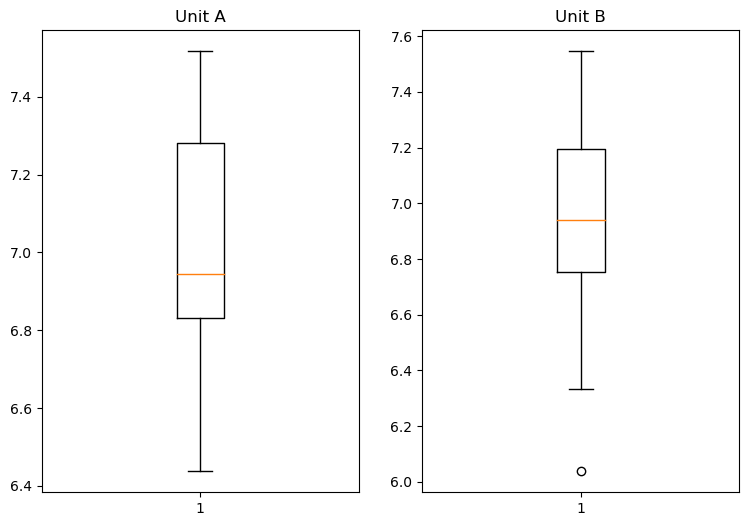

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

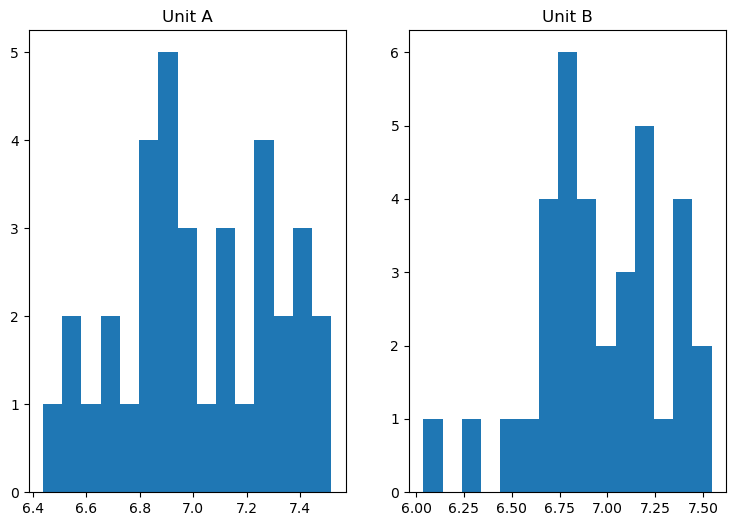

In [12]:
plt.subplots(figsize =(9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

<AxesSubplot:xlabel='Unit B', ylabel='Density'>

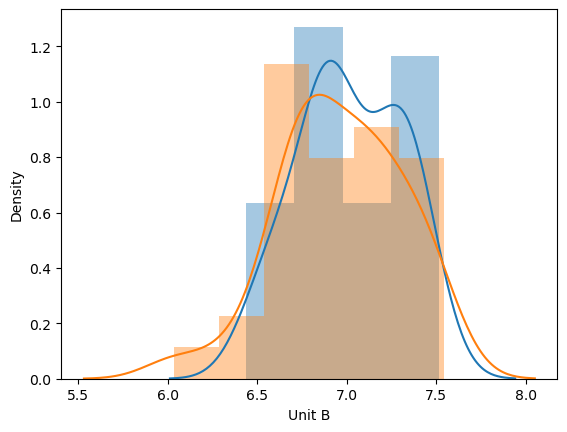

In [13]:
sns.distplot(cutlets['Unit A'])
sns.distplot(cutlets['Unit B'])

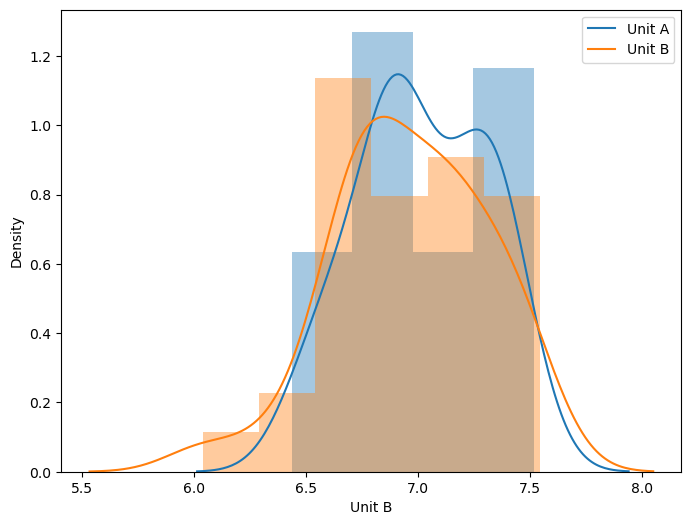

In [14]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

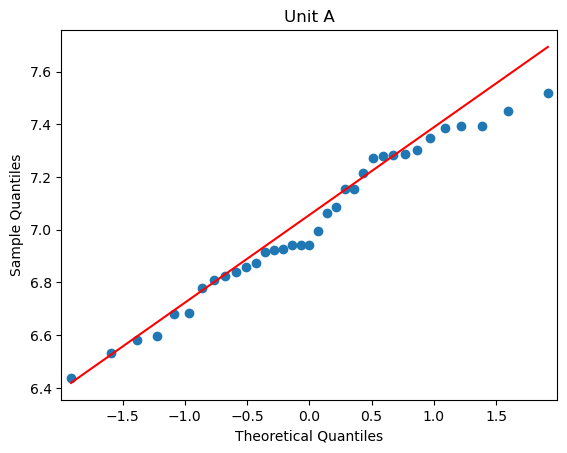

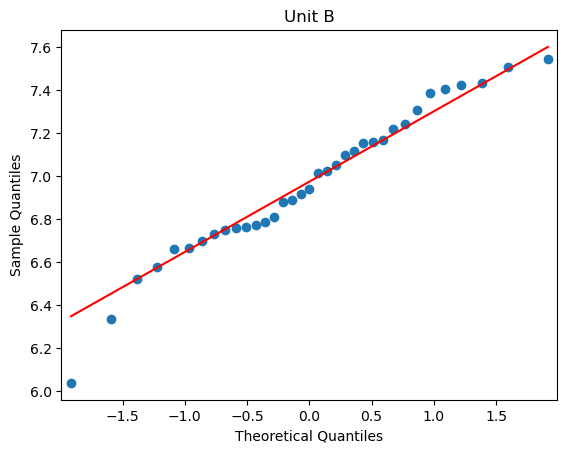

In [15]:
sm.qqplot(cutlets['Unit A'],line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets['Unit B'],line = 'q')
plt.title('Unit B')
plt.show()

In [16]:
from scipy.stats import ttest_ind

In [17]:
statistics,p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'],alternative = 'two-sided')
print('p_value = ',p_value)

p_value =  0.4722394724599501


# compare p value with '

In [18]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value)) 
if p_value <=alpha:  
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
     print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


# QUESTION 2

# # Null hypothesis: µ1 = µ2=µ3=µ4
## Alternate Hypothesis :- Atleast One of them is Differente

In [19]:
labtat = pd.read_csv(r"C:\Users\dell\Desktop\assignment\LabTAT.csv")

In [20]:
labtat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [21]:
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [22]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [23]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [24]:
labtat[labtat.duplicated()].shape

(0, 4)

In [25]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [26]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


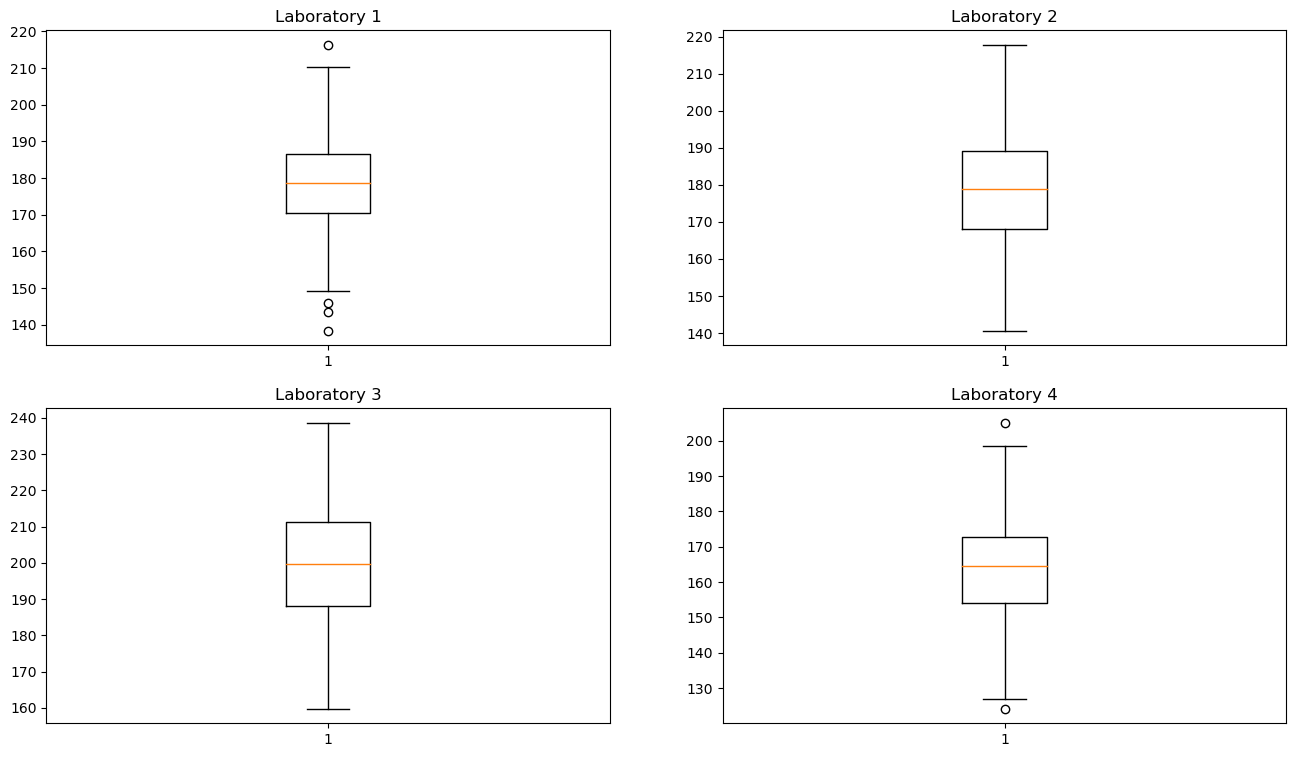

In [27]:
plt.subplots(figsize=(16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

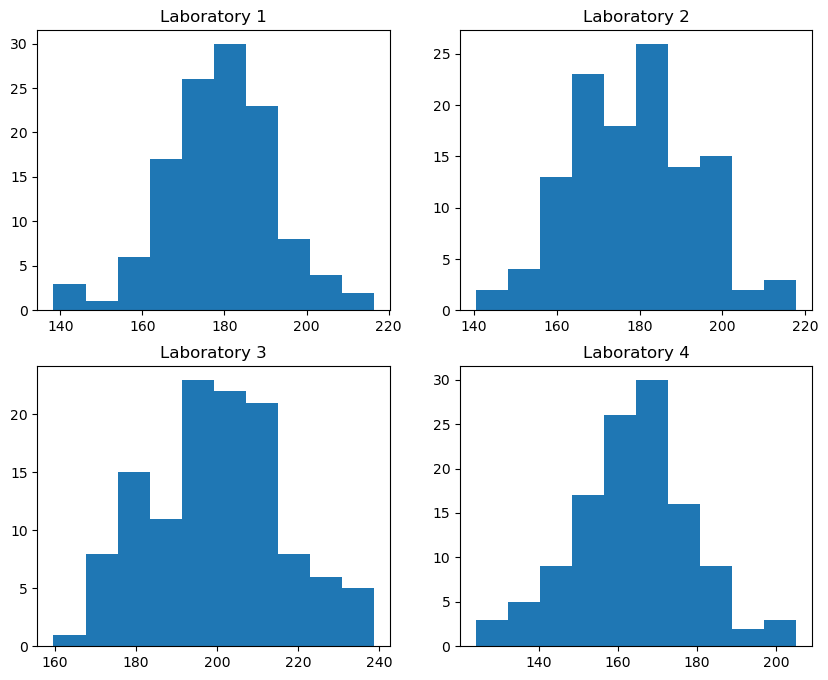

In [28]:
plt.subplots(figsize=(10,8))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

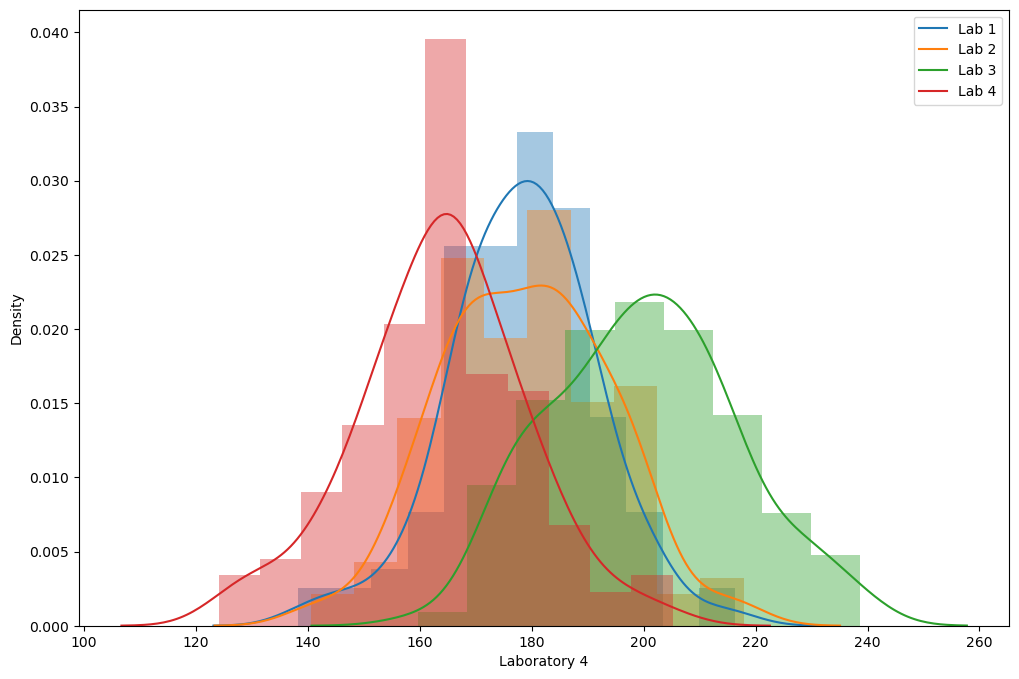

In [29]:
plt.figure(figsize=(12,8))
labels = ['Lab 1','Lab 2','Lab 3','Lab 4']
sns.distplot(labtat['Laboratory 1'],kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)

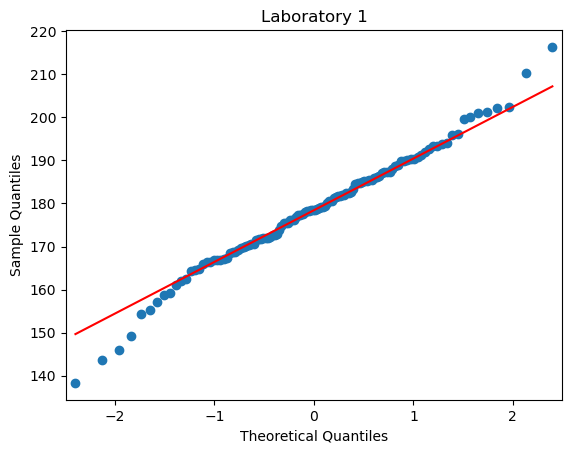

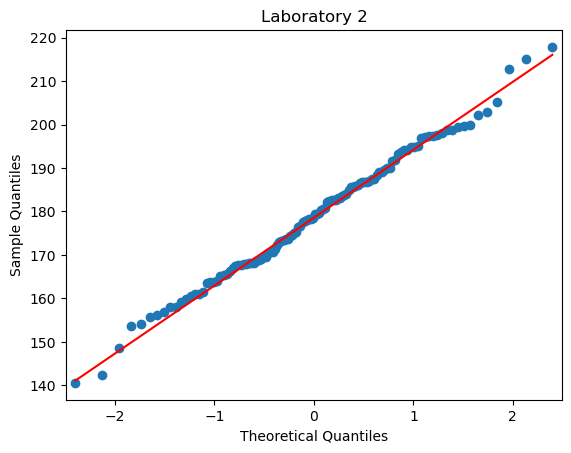

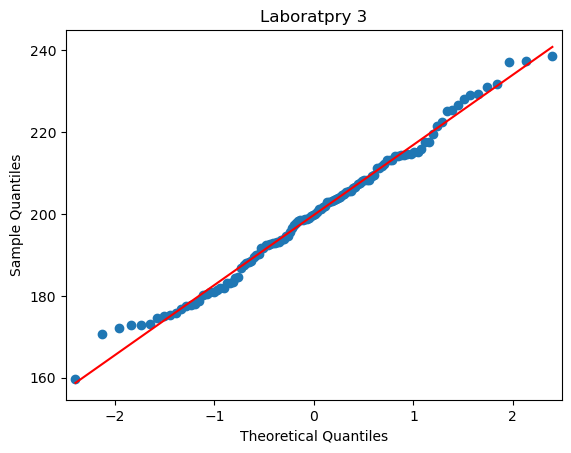

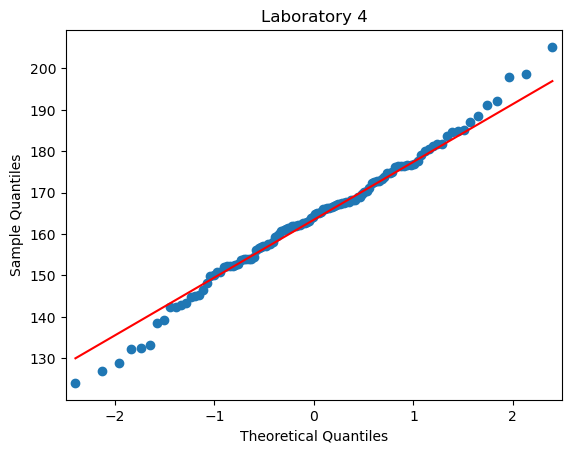

In [30]:
sm.qqplot(labtat['Laboratory 1'],line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'],line ='q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'],line ='q')
plt.title('Laboratpry 3')
sm.qqplot(labtat['Laboratory 4'],line ='q')
plt.title('Laboratory 4')
plt.show()

## ANOVA TEST

In [31]:
from scipy.stats import f_oneway

In [32]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [33]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# # QUESTION 3

# Null Hypothess:-There is no association or dependency between the gender based buyer rations across regions
# Alternate Hypothesis:- There is a significant association or dependency between the gender based buyer rations across regions

In [34]:
buyer = pd.read_csv(r"C:\Users\dell\Desktop\assignment\BuyerRatio.csv")

In [35]:
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [36]:
table = [[50,142,131,79],
        435,1523,1356,750]

In [43]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [44]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [45]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


## QUESTION 4

# null Hypothesis :- µ1=µ2=µ3=µ4
# Alternate Hypothesis : Atleast One of them is Differente

In [46]:
centers = pd.read_csv(r"C:\Users\dell\Desktop\assignment\Costomer+OrderForm.csv")

In [47]:
centers

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [48]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [49]:
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [50]:
centers[centers.isnull().any(axis = 1)]

,Phillippines,Indonesia,Malta,India


In [51]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [52]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [53]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [54]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [55]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [56]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis
